### data cleaning & basic plotting with data over 9M rows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from datetime import datetime

In [5]:
# read main file
df=pd.read_csv(r'./臺北捷運每日分時各站OD流量統計資料_202005.csv')
df

,日期 時段 進站 出站 人次
0,---------- ------ ----------------------------...
1,2020-05-01 00 松山機場 ...
2,2020-05-01 00 松山機場 ...
3,2020-05-01 00 松山機場 ...
4,2020-05-01 00 松山機場 ...
...,...
9218809,2020-05-31 23 新北產業園區 ...
9218810,2020-05-31 23 新北產業園區 ...
9218811,2020-05-31 23 新北產業園區 ...
9218812,警告: 彙總或其他 SET 作業已刪除 Null 值。


In [8]:
# original data: 
## all info in 1 column
## first 1 and last 2 rows are noise

# drop noise
df=df.drop(0,axis=0)
df=df.drop(df.tail(2).index)
len(df)

9218811

In [9]:
# cell content structure
df.iloc[1, 0]

'2020-05-01 00     松山機場                           中山國中                           0'

In [10]:
# create new dataframe with column name
df1 = pd.DataFrame(columns = ['Date',  'WeekDay','Hour', 'InStn', 'OutStn', 'Rideship'])

# put clean data into new dataframe
df1['Date']=df.iloc[:,0].astype(str).apply(lambda x: x.split()[0])
df1['WeekDay']=df.iloc[:,0].astype(str).apply(lambda x: str(datetime.strptime(x.split()[0], '%Y-%m-%d').isoweekday()))
df1['Hour']=df.iloc[:,0].astype(str).apply(lambda x: x.split()[1])
df1['InStn']=df.iloc[:,0].astype(str).apply(lambda x: x.split()[2])
df1['OutStn']=df.iloc[:,0].astype(str).apply(lambda x: x.split()[3])
df1['Rideship']=df.iloc[:,0].astype(str).apply(lambda x: int(x.split()[4]))
df1

,Date,WeekDay,Hour,InStn,OutStn,Rideship
1,2020-05-01,5,00,松山機場,松山機場,0
2,2020-05-01,5,00,松山機場,中山國中,0
3,2020-05-01,5,00,松山機場,南京復興,0
4,2020-05-01,5,00,松山機場,忠孝復興,0
5,2020-05-01,5,00,松山機場,大安,0
...,...,...,...,...,...,...
9218807,2020-05-31,7,23,新北產業園區,板新,2
9218808,2020-05-31,7,23,新北產業園區,Y板橋,4
9218809,2020-05-31,7,23,新北產業園區,新埔民生,3
9218810,2020-05-31,7,23,新北產業園區,幸福,5


In [11]:
df1.duplicated().any()

False

In [12]:
df1.isnull().any()

Date        False
WeekDay     False
Hour        False
InStn       False
OutStn      False
Rideship    False
dtype: bool

In [13]:
df1['Rideship'].unique()

array([  0,   1,   4,   2,   5,   3,   6,   8,   9,  13,   7,  11,  19,
        10,  12,  16,  20,  21,  14,  15,  33,  30,  23,  22,  18,  39,
        17,  26,  24,  43,  -1,  25,  27,  29,  37,  46,  36,  31,  48,
        45,  35,  79,  81,  28,  52,  68,  42,  32,  62,  40,  38,  49,
        41,  75,  73, 110,  47,  53,  70,  56,  55,  34,  54, 109,  86,
        96, 116,  85,  44,  50,  93,  60,  59,  63, 156, 198, 221, 111,
       186,  74,  67,  51,  90, 107,  65,  57,  69,  83,  61,  77,  58,
       100,  71, 162,  82, 122,  88,  89,  95,  92,  66,  76, 245, 225,
       123,  64, 138, 106, 120, 150,  98,  91,  72,  87, 113, 149, 101,
       108, 143, 196, 179, 160, 165,  99, 103, 125, 151, 194,  78, 142,
       119, 133,  94, 115, 137, 129,  84, 206, 126,  80, 105, 112, 195,
       104, 155, 130, 144, 168, 161, 187, 134, 222, 232, 128, 141, 135,
       145,  97, 173, 219, 147, 139, 132, 212, 102, 166, 170, 174, 172,
       184, 246, 153, 214, 124, 117, 140, 152, 208, 157, 240, 17

In [14]:
# replace negative rideship as 0
print('Rows: ' + str(len(df1[df1['Rideship']< 0])))
df1['Rideship']= df1['Rideship'].apply(lambda x: 0 if x< 0 else x)

Rows: 89


In [16]:
# read mandarin & english station name file
dftmp=pd.read_csv('./STN List.csv')
dftmp

,station_code,construction_id,station_name_tw,station_name_en,line_code,line_name,address,lat,lon
0,BR01,BR13,動物園,Taipei Zoo,BR,文湖線,台北市文山區新光路二段32號,24.998197,121.579338
1,BR02,BR12,木柵,Muzha,BR,文湖線,台北市文山區木柵路四段135號,24.998241,121.573145
2,BR03,BR11,萬芳社區,Wanfang Community,BR,文湖線,台北市文山區萬芳路60號,24.998585,121.568102
3,BR04,BR10,萬芳醫院,Wanfang Hospital,BR,文湖線,台北市文山區興隆路三段113號,24.999386,121.558152
4,BR05,BR9,辛亥,Xinhai,BR,文湖線,台北市文山區辛亥路四段128號,25.005475,121.557107
...,...,...,...,...,...,...,...,...,...
151,A17,A17,領航,Linghang,A,機場線,桃園市大園區領航北路四段351號,25.018970,121.213687
152,A18,A18,高鐵桃園站,Taoyuan HSR Station,A,機場線,桃園市中壢區高鐵北路一段5號,25.013762,121.211973
153,A19,A19,桃園體育園區,Taoyuan Sports Park,A,機場線,桃園市中壢區高鐵南路二段350號,25.001996,121.201306
154,A20,A20,興南,Xingnan,A,機場線,桃園市中壢區中豐北路一段685號,24.980249,121.214073


In [17]:
# take needed column & rename
dfname=dftmp.rename(columns={'station_name_tw':'OutStn','station_name_en':'EngStn'}).iloc[:,2:4]
dfname

,OutStn,EngStn
0,動物園,Taipei Zoo
1,木柵,Muzha
2,萬芳社區,Wanfang Community
3,萬芳醫院,Wanfang Hospital
4,辛亥,Xinhai
...,...,...
151,領航,Linghang
152,高鐵桃園站,Taoyuan HSR Station
153,桃園體育園區,Taoyuan Sports Park
154,興南,Xingnan


In [19]:
dfname.duplicated().any()

True

In [20]:
# drop dupliactes
dfname[dfname.duplicated()==True]
print('Duplicated Stn Count: '+ str(dfname.duplicated().sum()))
dfname= dfname.drop_duplicates()
print('After Drop: '+str(len(dfname)))

Duplicated Stn Count: 20
After Drop: 136


In [21]:
# find different station name between 2 df
for i in df1['OutStn'].unique():
    if i not in dfname['OutStn'].unique(): print(i)

BL板橋
大橋頭站
Y板橋


In [22]:
# rename inconsistent station name
df1['OutStn']= df1['OutStn'].apply(lambda x: '板橋' if x=='BL板橋' or x=='Y板橋' else x)
df1['OutStn']= df1['OutStn'].apply(lambda x: '大橋頭' if x=='大橋頭站' else x)

In [23]:
# merge 2 dataframe
dfmain=df1.iloc[:,[0,1,2,4,5]].merge(dfname, how='left',on='OutStn').iloc[:,[0,1,2,3,5,4]]
dfmain

,Date,WeekDay,Hour,OutStn,EngStn,Rideship
0,2020-05-01,5,00,松山機場,Songshan Airport,0
1,2020-05-01,5,00,中山國中,Zhongshan Junior High School,0
2,2020-05-01,5,00,南京復興,Nanjing Fuxing,0
3,2020-05-01,5,00,忠孝復興,Zhongxiao Fuxing,0
4,2020-05-01,5,00,大安,Daan,0
...,...,...,...,...,...,...
9218806,2020-05-31,7,23,板新,Banxin,2
9218807,2020-05-31,7,23,板橋,Banqiao,4
9218808,2020-05-31,7,23,新埔民生,Xinpu Minsheng,3
9218809,2020-05-31,7,23,幸福,Xingfu,5


In [14]:
# # merge 2 dataframe
# dfmain= dfmain.merge(dfname, how='left',on='OutStn').iloc[:,[0,1,2,3,5,4]]
# dfmain

,Date,WeekDay,Hour,OutStn,EngStn,Rideship
0,2020-05-01,5,00,松山機場,Songshan Airport,0
1,2020-05-01,5,00,中山國中,Zhongshan Junior High School,0
2,2020-05-01,5,00,南京復興,Nanjing Fuxing,0
3,2020-05-01,5,00,忠孝復興,Zhongxiao Fuxing,0
4,2020-05-01,5,00,大安,Daan,0
...,...,...,...,...,...,...
9218806,2020-05-31,7,23,板新,Banxin,2
9218807,2020-05-31,7,23,板橋,Banqiao,4
9218808,2020-05-31,7,23,新埔民生,Xinpu Minsheng,3
9218809,2020-05-31,7,23,幸福,Xingfu,5


In [24]:
# top 10 stn with high rideship
dfmain.groupby(['EngStn']).sum().nlargest(10, 'Rideship')
## taipei main station rideship is times more than others

,Rideship
EngStn,
Taipei Main Station,3246255
Taipei City Hall,1571119
Ximen,1445269
Banqiao,1248077
Zhongxiao Fuxing,1121080
Zhongshan,1069866
Xinpu,1028305
Nanjing Fuxing,977883
Dingxi,957044


In [25]:
top10lst= dfmain.groupby(['EngStn']).sum().nlargest(10,'Rideship').index.tolist()

In [26]:
# top 10 stn with high rideship
dfmain[(dfmain['WeekDay']!='6') & (dfmain['WeekDay']!='7')].groupby(['Hour']).sum().nlargest(10, 'Rideship')
## besides weekend, highest commuting hours are 08 & 18

,Rideship
Hour,
08,4947438
18,4877287
19,3385535
17,3310813
07,2892811
09,2707472
16,2058815
20,1996872
21,1856821


In [27]:
## top 10 date with high rideship
dfmain.groupby(['Date']).sum().nlargest(10,'Rideship')

,Rideship
Date,
2020-05-29,2140400
2020-05-15,2101469
2020-05-22,2063468
2020-05-08,2044317
2020-05-27,1982750
2020-05-28,1962211
2020-05-20,1959385
2020-05-21,1947500
2020-05-26,1927300


In [28]:
# total rideship on each weekday
dfmain.groupby(['WeekDay']).sum().sort_values(by=['Rideship'], ascending=False)
### usage of taipei metro: workday more than weekend

,Rideship
WeekDay,
5,9802803
3,7727851
4,7698569
2,7520300
1,7363174
6,7061921
7,6035078


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

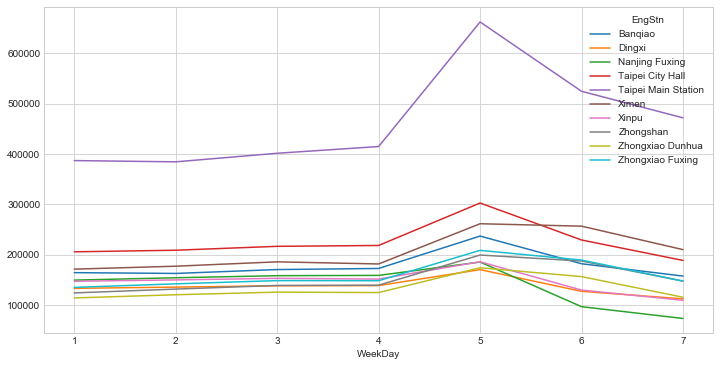

In [31]:
# top 10 stations rideship by weekday
dfmain.loc[dfmain['EngStn'].isin(top10lst),:].groupby(['EngStn', 'WeekDay']).sum().reset_index().pivot('WeekDay','EngStn','Rideship').plot(figsize=(12, 6))

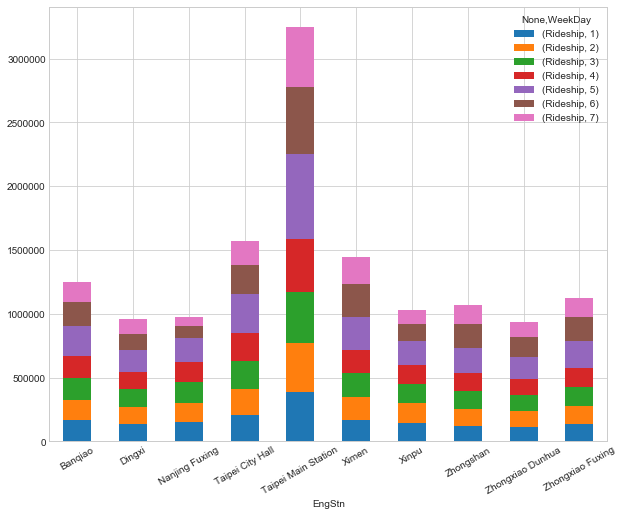

In [32]:
dfmain.loc[dfmain['EngStn'].isin(top10lst),:].groupby(['EngStn', 'WeekDay']).sum().unstack().plot(kind="bar",stacked=True,figsize=(10,8), rot=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDC9742648>,
      dtype=object)

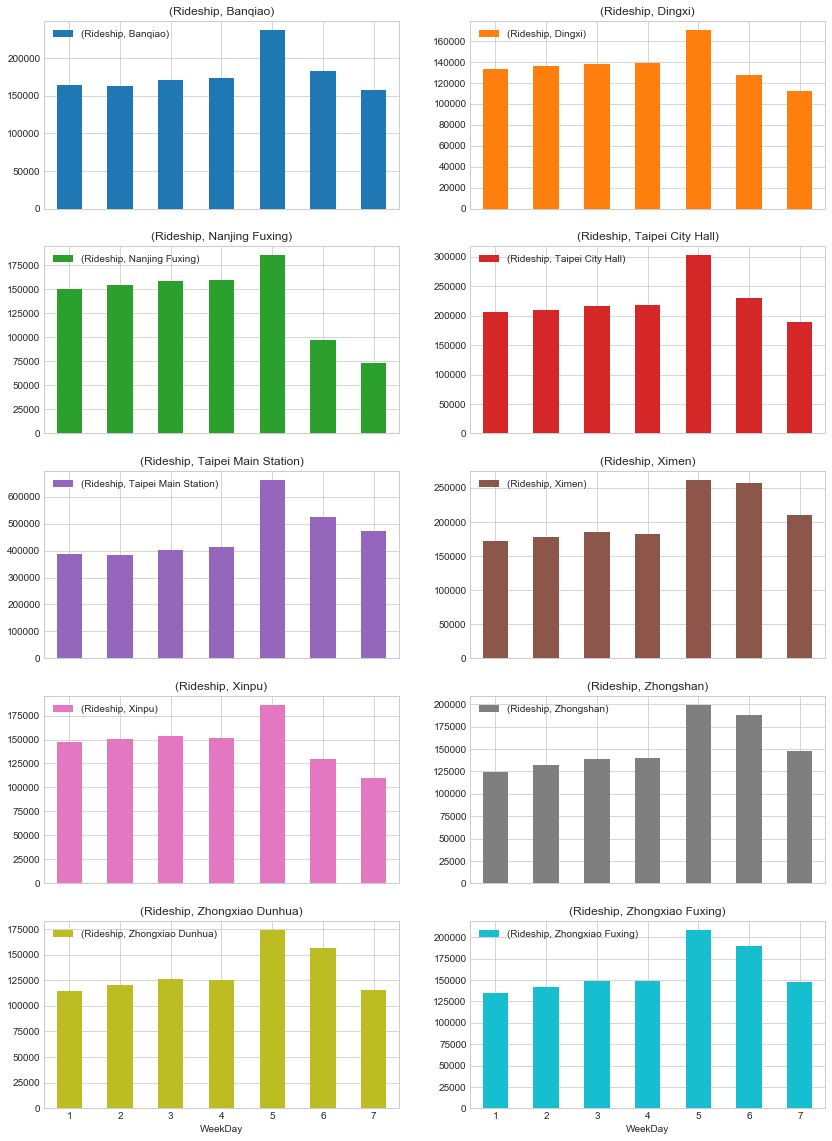

In [36]:
# top 10 stations rideship by weekday
# in seperate bar chart
dfmain.loc[dfmain['EngStn'].isin(top10lst),:].groupby(['EngStn', 'WeekDay']).sum().unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(14, 20), layout=(5,2))